In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [91]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [92]:
!wget $data -O data-week-3.csv

--2023-10-02 16:29:20--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8000::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: 'data-week-3.csv'

     0K .......... .......... .......... .......... ..........  3%  769K 2s
    50K .......... .......... .......... .......... ..........  6% 1.35M 1s
   100K .......... .......... .......... .......... .......... 10% 1.76M 1s
   150K .......... .......... .......... .......... .......... 13% 1.47M 1s
   200K .......... .......... .......... .......... .......... 17% 1.74M 1s
   250K .......... .......... .......... .......... .......... 20% 1.96M 1s
   300K .......... .......... .......... .......... .......... 

In [93]:
df =  pd.read_csv('data-week-3.csv')

In [94]:
columns_to_use = [
    "Make", "Model", "Year", "Engine HP", "Engine Cylinders", 
    "Transmission Type", "Vehicle Style", "highway MPG", "city mpg", "MSRP"
]
filtered_df = df[columns_to_use]
filtered_df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [95]:
filtered_df.columns = filtered_df.columns.str.replace(' ', '_').str.lower()

In [96]:
filtered_df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [97]:
# Fill missing values with 0
filtered_df = filtered_df.fillna(0)

# Rename 'msrp' to 'price'
filtered_df = filtered_df.rename(columns={"msrp": "price"})
filtered_df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [98]:
filtered_df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
price                0
dtype: int64

In [99]:
# Find the mode of the 'transmission_type' column
filtered_df.transmission_type.value_counts(normalize = True).index[0]

'AUTOMATIC'

In [101]:
categorical_cols = []
for col in filtered_df.columns:
    if filtered_df[col].dtypes == 'object':
        categorical_cols.append(col)
        
categorical_cols

['make', 'model', 'transmission_type', 'vehicle_style']

In [102]:
df_numeric = filtered_df.drop(labels=categorical_cols, axis = 1)
df_numeric.head()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
0,2011,335.0,6.0,26,19,46135
1,2011,300.0,6.0,28,19,40650
2,2011,300.0,6.0,28,20,36350
3,2011,230.0,6.0,28,18,29450
4,2011,230.0,6.0,28,18,34500


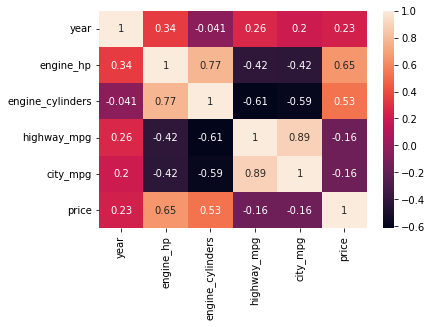

In [103]:
sns.heatmap(df_numeric.corr(), annot=True)
plt.show()

In [105]:
# Find the two features that have the biggest correlation (excluding the diagonal)
correlation_matrix = filtered_df.corr()
correlation_matrix_no_diagonal = correlation_matrix.where(~np.eye(correlation_matrix.shape[0], dtype=bool))
max_corr_value = correlation_matrix_no_diagonal.stack().abs().idxmax()

max_corr_value

('highway_mpg', 'city_mpg')

In [106]:
# Create the 'above_average' column based on the mean value of 'price'
filtered_df['above_average'] = (filtered_df['price'] > filtered_df['price'].mean()).astype(int)
filtered_df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0


In [107]:

from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target (y)
X = filtered_df.drop('above_average', axis=1)
y = filtered_df['above_average']

# Splitting the data into train/test sets (80%/20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Splitting the temporary data into train/validation sets (75%/25% of the 80%)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)
X_train.shape, X_val.shape, X_test.shape

((7148, 10), (2383, 10), (2383, 10))

In [108]:
from sklearn.feature_selection import mutual_info_classif
categorical_vars = ['make', 'model', 'transmission_type', 'vehicle_style']
# Convert categorical variables to integer encodings for mutual information calculation
X_train_encoded = X_train[categorical_vars].apply(lambda x: x.astype('category').cat.codes)

# Calculate mutual information scores for the encoded categorical variables
mi_scores = mutual_info_classif(X_train_encoded, y_train, discrete_features=True)

# Round the scores to 2 decimals and map to the corresponding variables
mi_scores_rounded = dict(zip(categorical_vars, [round(score, 2) for score in mi_scores]))

# Find the variable with the lowest mutual information score
lowest_mi_var = min(mi_scores_rounded, key=mi_scores_rounded.get)
mi_scores_rounded, lowest_mi_var

({'make': 0.24,
  'model': 0.46,
  'transmission_type': 0.02,
  'vehicle_style': 0.08},
 'transmission_type')

In [109]:
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

C:\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [1, 3, 7, 8, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [110]:
# Initialize the logistic regression model
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

# Train the model
model.fit(X_train_encoded, y_train)

# Predict on the validation set
y_val_pred = model.predict(X_val_encoded)

# Calculate accuracy on the validation dataset
accuracy = accuracy_score(y_val, y_val_pred)
rounded_accuracy = round(accuracy, 2)

rounded_accuracy

0.97

In [111]:
# List of features to evaluate
features_to_evaluate = ['year', 'engine_hp', 'transmission_type', 'city_mpg']

# Original model accuracy (from previous computation)
original_accuracy = rounded_accuracy

# Store the differences in accuracy for each feature when excluded
accuracy_differences = {}

# Iterate over each feature, exclude it, train the model and compute the difference in accuracy
for feature in features_to_evaluate:
    # Exclude the current feature
    X_train_subset = X_train.drop(feature, axis=1)
    X_val_subset = X_val.drop(feature, axis=1)
    
    # One-hot encode the subset
    X_train_encoded_subset = encoder.fit_transform(X_train_subset)
    X_val_encoded_subset = encoder.transform(X_val_subset)
    
    # Train the model on the subset
    model.fit(X_train_encoded_subset, y_train)
    
    # Predict and compute accuracy for the subset
    y_val_pred_subset = model.predict(X_val_encoded_subset)
    subset_accuracy = accuracy_score(y_val, y_val_pred_subset)
    
    # Compute and store the difference in accuracy
    accuracy_differences[feature] = round(original_accuracy - subset_accuracy, 2)

# Find the feature with the smallest difference in accuracy
smallest_difference_feature = min(accuracy_differences, key=accuracy_differences.get)

accuracy_differences, smallest_difference_feature

C:\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [1, 2, 6, 7, 8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [1, 6, 7, 8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [1, 3, 6, 7, 8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [1, 3, 7, 8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


({'year': 0.0, 'engine_hp': -0.0, 'transmission_type': 0.0, 'city_mpg': 0.0},
 'year')

In [113]:
# Apply logarithmic transformation to the 'price' column
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)

# List of alpha values to evaluate
alphas = [0, 0.01, 0.1, 1, 10]

# Store the RMSE for each alpha value
rmse_scores = {}

# Iterate over each alpha, train the model and compute the RMSE
for alpha in alphas:
    # Initialize and train the Ridge regression model
    model2 = Ridge(alpha=alpha, solver='sag', random_state=42)
    model2.fit(X_train_encoded, y_train_log)
    
    # Predict on the validation set and compute RMSE
    y_val_pred_log = model2.predict(X_val_encoded)
    rmse = np.sqrt(mean_squared_error(y_val_log, y_val_pred_log))
    
    # Store the RMSE
    rmse_scores[alpha] = round(rmse, 3)

# Find the alpha with the best (smallest) RMSE
best_alpha = min(rmse_scores, key=rmse_scores.get)
rmse_scores, best_alpha

({0: 0.125, 0.01: 0.117, 0.1: 0.107, 1: 0.114, 10: 0.144}, 0.1)